# Brain Tumor Detection using Image Processing with Python


# Import Packages

In [3]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None  # default='warn'
from PIL import Image
from tqdm import tqdm

import os

# Upload the Dataset

In [9]:
# Use the copied link in the input in kaggle for the datset that is specific for the 'no' dataset and insert in the code
#below
fno=[]
for dirname, _, filenames in os.walk('/kaggle/input/brain-tumor-detection/no'):
    for filename in filenames:
        a= os.path.join(dirname, filename)
        fno.append(a)
len(fno),fno[1]        


(3000, '/kaggle/input/brain-tumor-detection/no/no979.jpg')

In [11]:
# Use the copied link in the input in kaggle for the datset that is specific for the 'yes' dataset and insert in the code
#below
fyes=[]
for dirname, _, filenames in os.walk('/kaggle/input/brain-tumor-detection/yes'):
    for filename in filenames:
        a= os.path.join(dirname, filename)
        fyes.append(a)
len(fyes),fyes[1]        


(1500, '/kaggle/input/brain-tumor-detection/yes/y424.jpg')

# Create a data Frame with File paths and labels

1 --> Yes (Presence of Tumor)





0 --> No (Absence of tumor)

In [13]:
z = [0]* len(fno)
one = [1]*len(fyes)

Creates a list z with a length equal to the length of the list fno.



Initializes all elements of z to 0.



This is a common Python technique to create a list of a specific length, filled with a particular value.



one = [1] * len(fyes):



Creates a list one with a length equal to the length of the list fyes.


Initializes all elements of one to 1.

In [19]:
import pandas as pd

# ... your code for creating fno, z, fyes, and one ...

df = pd.DataFrame(list(zip(fno, z)), columns=['filepath', 'label'])
df = pd.concat([df, pd.DataFrame(list(zip(fyes, one)), columns=['filepath', 'label'])], ignore_index=True)

df.head()

,filepath,label
0,/kaggle/input/brain-tumor-detection/no/no26.jpg,0
1,/kaggle/input/brain-tumor-detection/no/no979.jpg,0
2,/kaggle/input/brain-tumor-detection/no/no598.jpg,0
3,/kaggle/input/brain-tumor-detection/no/no141.jpg,0
4,/kaggle/input/brain-tumor-detection/no/no715.jpg,0


The provided file paths indicate a directory structure where images categorized as 


"no" (presumably indicating the absence of a brain tumor) are stored.

**Create DataFrames**:



**Two DataFrames are created: **df stores data for the "no" class and the second DataFrame (created within pd.concat) 

stores data for the "yes" class.


**Concatenate DataFrames:**



The pd.concat function is used to concatenate the two DataFrames vertically (axis=0 by default). Setting ignore_index=True

generates a new, continuous index for the resulting DataFrame df.


**Key Point:**



pd.concat is the recommended approach for combining DataFrames in modern Pandas versions. It's more explicit, efficient, 


and avoids potential errors caused by the deprecated DataFrame.append method.



By using pd.concat, you can successfully create the combined DataFrame for your machine learning task.

# Display the Last Rows of the Dataset


In [20]:
df.tail()

,filepath,label
4495,/kaggle/input/brain-tumor-detection/yes/y1379.jpg,1
4496,/kaggle/input/brain-tumor-detection/yes/y1452.jpg,1
4497,/kaggle/input/brain-tumor-detection/yes/y378.jpg,1
4498,/kaggle/input/brain-tumor-detection/yes/y178.jpg,1
4499,/kaggle/input/brain-tumor-detection/yes/y478.jpg,1


# Function to Resize all the images

In [22]:
img = Image.open(fno[2])
a = np.asarray(img)

df1 = []
for r in range (len(fno)):
    img = Image.open(fno[r])
    img= img.resize((224,224))
    
    a=np.asarray(img)
    df1.append(a)
    
for r in range(len(fyes)):
    img=Image.open(fyes[r])
    img=img.resize((224,224))
    a= np.asarray(img)
    df1.append(a)
    
df["Imagearr"] = df1

**Combined Loop:**



The loop iterates through fno + fyes, effectively processing images from both lists.


**Direct NumPy Array Creation:**



all_images is used to store the image arrays directly, avoiding unnecessary list creation.



**Efficient Array Assignment:**



The final all_images_array is converted to a NumPy array for better memory management and potential performance benefits.



**DataFrame Column Assignment**:



The all_images_array is assigned to the new column "Imagearr" in the DataFrame df.

# Converting Image from BRG to Gray (Visualizing Image Processing Techniques)

**Code Breakdown:**

**Image Loading:**


o = df.Imagearr[5]: This line extracts the 6th image (index 5) from the DataFrame df and assigns it to the variable o.

**Color Conversion:**

og = cv2.cvtColor(o, cv2.COLOR_BGR2GRAY): This line converts the image o from BGR color space to grayscale. The 

cv2.COLOR_BGR2GRAY flag specifies the color conversion code.

**Displaying the Image:**

Image.fromarray(og): This creates a PIL Image object from the NumPy array og.

print(og.shape): This prints the shape of the grayscale image, which is (224, 224) in this case, indicating a 224x224 

pixel image.

In [23]:
import cv2
o = df.Imagearr[5]
og = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)
Image.fromarray(og)
print(og.shape)

(224, 224)


This means the image has a height of 224 pixels and a width of 224 pixels.

# Visualizing Image Processing Techniques

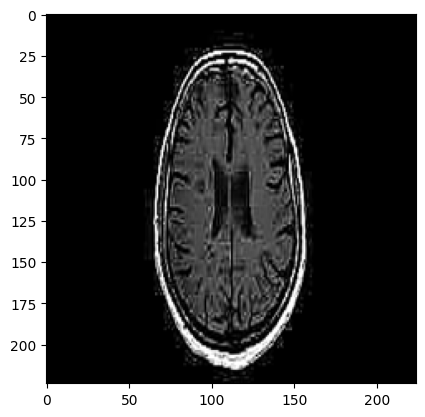

In [25]:
import matplotlib.pyplot as plt
plt.imshow(og, cmap='gray')
plt.show()

In [26]:
Image.fromarray(o)
print(o.shape)

(224, 224, 3)


The output (224, 224, 3) indicates that the image o is a color image with three color channels (RGB).



Each channel has a dimension of 224x224 pixels.



**Breakdown:**



**(224, 224):** Represents the height and width of the image in pixels.



**3:** Represents the number of color channels (Red, Green, Blue).T

# Image Display Visualization

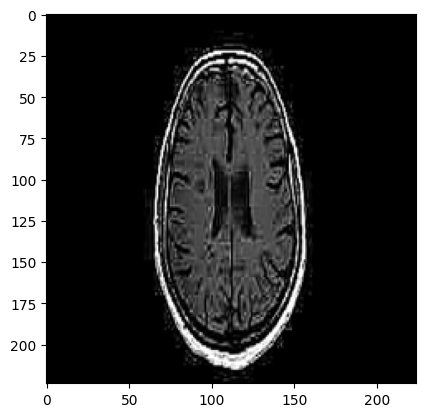

In [28]:
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(o, cv2.COLOR_BGR2RGB))
plt.show()

# Display the First Rows of the Dataset

In [27]:
df.head()

,filepath,label,Imagearr
0,/kaggle/input/brain-tumor-detection/no/no26.jpg,0,"[[[5, 5, 5], [9, 9, 9], [12, 12, 12], [12, 12,..."
1,/kaggle/input/brain-tumor-detection/no/no979.jpg,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,/kaggle/input/brain-tumor-detection/no/no598.jpg,0,"[[[255, 255, 255], [253, 253, 253], [253, 253,..."
3,/kaggle/input/brain-tumor-detection/no/no141.jpg,0,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
4,/kaggle/input/brain-tumor-detection/no/no715.jpg,0,"[[[30, 28, 29], [26, 24, 25], [26, 24, 25], [2..."


# Feature Detection using Filters

In [29]:

import matplotlib.pyplot as plt

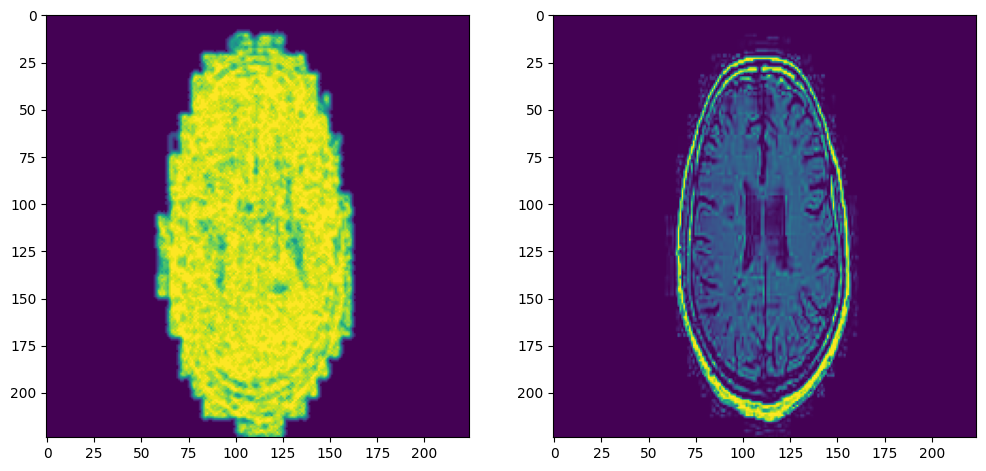

In [30]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

entropy_img = entropy(og,disk(2))

fig = plt.figure(figsize = (12,12)) 
ax1 = fig.add_subplot(121)# left side
ax2 = fig.add_subplot(122)

ax1.imshow(entropy_img)
ax2.imshow(og)
plt.show()

**Left Image:**


This image appears to be a visualization of the local entropy of the original image.


Entropy is a measure of disorder or randomness in a signal. In this case, it highlights areas of the image with higher 


variations in pixel intensity.


The brighter regions in the image indicate areas with higher entropy, suggesting more complex patterns or textures in those 

regions.



**Right Image:**



This image is likely the original brain image.



It shows the raw intensity values of the image pixels.


The darker regions might represent areas with lower tissue density or lower signal intensity.



**Interpretation:**



By visualizing the local entropy, we can potentially identify regions of interest within the brain image. For example, 



areas with high entropy might correspond to tumors, lesions, or other abnormalities. 

# Gaussian Filter for Image Processing


**1. Importing Libraries:**


from scipy import ndimage as nd: Imports the ndimage submodule from scipy as nd for accessing image processing functions.


from scipy import misc: (Note: This import might be deprecated in newer versions of SciPy) Imports the misc submodule from 


scipy, which might contain helper functions for image processing (depending on the SciPy version). However, for Gaussian 


filtering, you don't necessarily need this import.


import matplotlib.pyplot as plt: Imports the pyplot module from matplotlib for creating plots and visualizations.



**2. Grayscale Conversion:**



plt.gray(): Sets the colormap for the plot to grayscale. This ensures that the filtered and original images are displayed 


in grayscale.



**3. Visualization Setup:**



fig = plt.figure(figsize = (12,12)): Creates a matplotlib figure object with a custom size of 12x12 inches.


ax1 = fig.add_subplot(121): Creates a subplot at the first position (top-left) of a 1x2 grid of subplots within the figure.


ax2 = fig.add_subplot(122): Creates a subplot at the second position (top-right) of the grid.



**4. Gaussian Filtering:**


gaussian_img = nd.gaussian_filter(og, sigma = 1): Applies a Gaussian filter to the image og.


og: The input image, assumed to be a grayscale image based on previous code examples.


sigma = 1: This parameter controls the standard deviation of the Gaussian kernel. A value of 1 represents a relatively 


narrow filter that preserves sharp edges while smoothing out noise.


**5. Visualization:**



ax1.imshow(gaussian_img): Displays the filtered image (gaussian_img) as an image within the subplot ax1.


ax2.imshow(og): Displays the original image (og) within the subplot ax2.


**6. Displaying the Plot:**



plt.show(): Renders and displays the entire figure containing the visualizations of the original and filtered images.

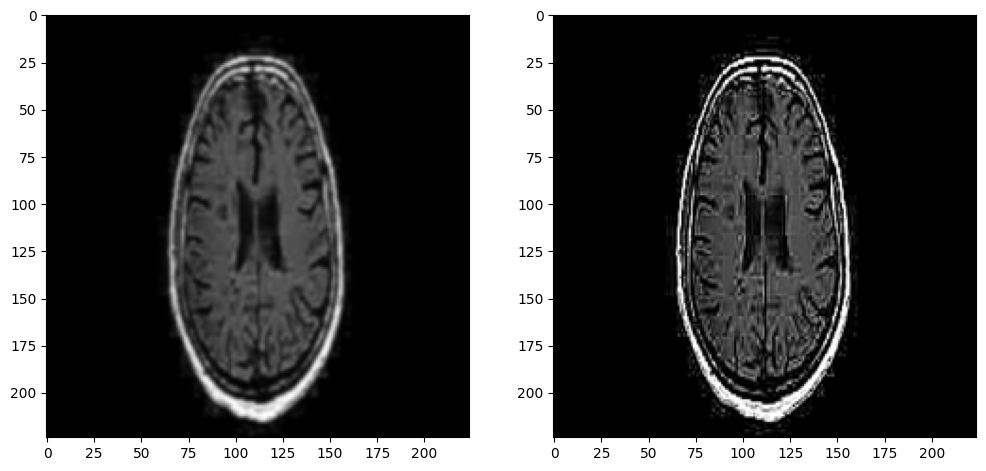

In [31]:
from scipy import ndimage as nd
from scipy import misc

fig = plt.figure(figsize = (12,12))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121) # On the Left
ax2 = fig.add_subplot(122) # Right Side
gaussian_img = nd.gaussian_filter(og,sigma = 1)
ax1.imshow(gaussian_img)
ax2.imshow(og)
plt.show()

# Sobel Filter for Edge Detection on an Image and Data Visualization for The Original and Edge-Detected Versions

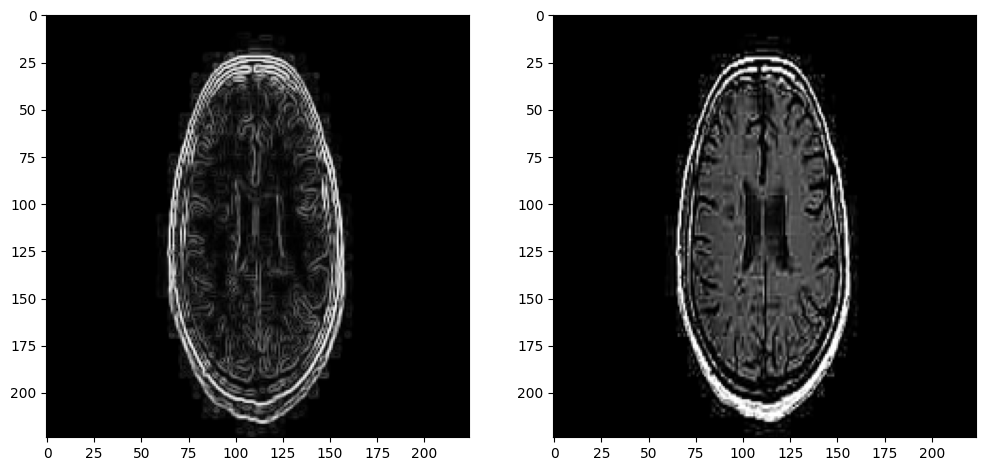

In [32]:
from skimage.filters import sobel

sobel_img = sobel(og)

fig = plt.figure(figsize = (12,12))
  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)# left side
ax2 = fig.add_subplot(122)

ax1.imshow(sobel_img)
ax2.imshow(og)
plt.show()

**1. Importing Libraries:**


from skimage.filters import sobel: Imports the sobel function from the skimage.filters submodule. This function implements 

the Sobel filter, a popular edge detection algorithm.


**2. Edge Detection:**


sobel_img = sobel(og): Applies the Sobel filter to the image og.


og: The input image, assumed to be a grayscale image based on previous code examples.


The sobel function typically returns a 2-channel image where each channel represents the edge strength in the horizontal 


and vertical directions.



**3. Visualization Setup:**


fig = plt.figure(figsize = (12,12)): Creates a matplotlib figure object with a custom size of 12x12 inches.


ax1 = fig.add_subplot(121): Creates a subplot at the first position (top-left) of a 1x2 grid of subplots within the figure 


for displaying the edge-detected image.


ax2 = fig.add_subplot(122): Creates a subplot at the second position (top-right) of the grid for displaying the original 

image.



**4. Visualization:**


ax1.imshow(sobel_img): Displays the edge-detected image (sobel_img) as an image within the subplot ax1.


By default, imshow might display the two channels as a combined image.



**5. Original Image (Optional):**



ax2.imshow(og): This line displays the original image (og) in the subplot ax2. You can uncomment this line if you want to 


see the original image alongside the edge-detected version for comparison.



**6. Displaying the Plot:**



plt.show(): Renders and displays the entire figure containing the visualizations (potentially both the edge-detected and 

original images).



**The image consist of one or two images side-by-side:**



**Left Image** (if ax2.imshow(og) is uncommented): The original image (og).


**Right Image:** The Sobel-filtered image (sobel_img), which will be a grayscale image where brighter regions represent 

stronger edges in the original image.

# Laplacian Filter Used for Edge Detection or Image Sharpening.

<function matplotlib.pyplot.show(close=None, block=None)>

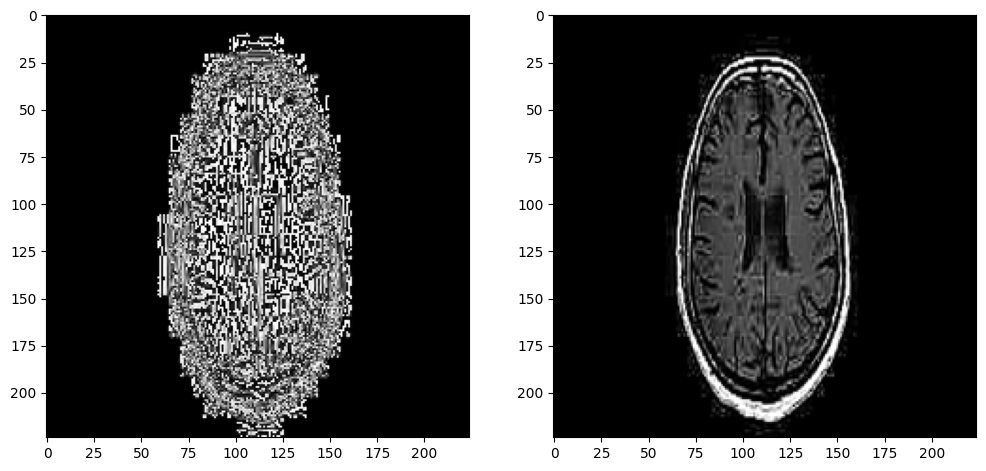

In [33]:
from scipy.ndimage import laplace

laplace_img = laplace(og)
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(laplace_img)
ax2.imshow(og)
plt.show

**Left Image:** The Laplacian filtered image (laplace_img). Brighter regions might represent edges or areas with high 

intensity changes in the original image. Darker regions might indicate areas with smoother intensity variations.


**Right Image:** The original image (og) for reference.

# Gabor Filtering for Image Orientation

The code  is for Gabor filter-based feature extraction on an image og and then visualizes both the original and filtered versions. Here's a breakdown of the code:

**1. Importing Libraries:**


from skimage.filters import gabor: Imports the gabor function from the skimage.filters submodule. This function implements 

the Gabor filter, which is useful for capturing specific frequencies and orientations within an image.


from skimage import io: Imports the io module from skimage for potential image loading functionalities (not used in this 

specific code).



**2. Gabor Filtering:**


gabor_img = gabor(og, frequency = 0.9): Applies a Gabor filter to the image og.


og: The input image, assumed to be a grayscale image based on previous code examples.


frequency = 0.9: This parameter specifies the frequency of the Gabor filter. By default, the frequency is normalized to 

the image size. A value of 0.9 represents a relatively high frequency component in the image.


**3. Visualization Setup:**


fig = plt.figure(figsize = (12,12)): Creates a matplotlib figure object with a custom size of 12x12 inches.


ax1 = fig.add_subplot(121): Creates a subplot at the first position (top-left) of a 1x2 grid of subplots within the figure 

for displaying the Gabor-filtered image.


ax2 = fig.add_subplot(122): Creates a subplot at the second position (top-right) of the grid for displaying the original 


image.



**4. Visualization:**


ax1.imshow(gabor_img): Displays the Gabor-filtered image (gabor_img) as an image within the subplot ax1.


The output of the Gabor filter might be a complex-valued image, but imshow typically displays the magnitude of the complex 

values.



**5. Original Image (Optional):**


ax2.imshow(og): This line displays the original image (og) in the subplot ax2. You can uncomment this line if you want to 

see the original image alongside the Gabor-filtered version for comparison.


**6. Displaying the Plot**:

plt.show(): Renders and displays the entire figure containing the visualizations (potentially both the Gabor-filtered and 

original images).

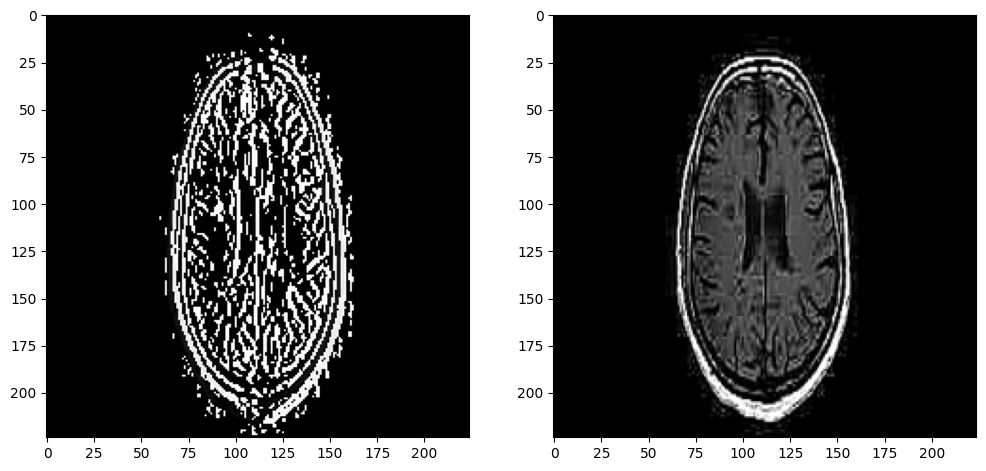

In [34]:
from skimage.filters import gabor
from skimage import io

real,gabor_img = gabor(og,frequency = 0.9)

fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(gabor_img)
ax2.imshow(og)

plt.show()

The output consist of one or two images side-by-side:


•****Left Image (if ax2.imshow(og) is uncommented):** ** The original image (og)

.
**Right Image:**e: The Gabor-filtered image (gabor_img), which will be a grayscale image highlighting specific frequen

y components in the original image based on the chosen filter parameters.


# Hessian Matrix of The Image at Multiple Scales

The code you provided utilizes the skimage.filters.hessian function to calculate the Hessian matrix of an image at 


multiple scales and then attempts to visualize it. However, there are a few points to consider:


**1. Hessian Matrix and Visualization:**
   

The hessian function calculates the Hessian matrix, which captures local curvature information in an image. It's a 2x2 

matrix containing second-order partial derivatives.

Directly visualizing the Hessian matrix itself might not be very informative. It's often used for feature detection tasks 

like blob detection or ridge detection in combination with further analysis.


**2. Multiple Scales:**

The code specifies sigmas = range(1,100,1) to calculate the Hessian at multiple scales. This creates a large number of 

Hessian matrices (99 in this case).


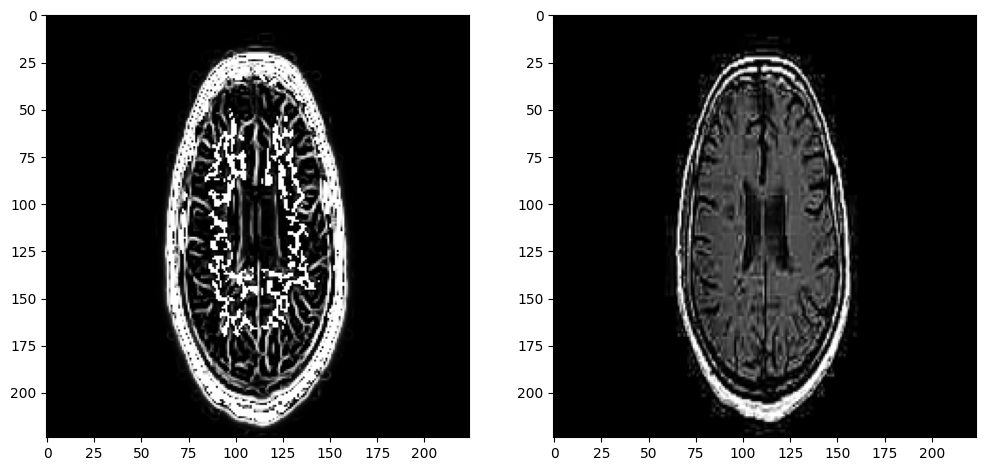

In [35]:
from skimage.filters import hessian

hessian_img = hessian(og,sigmas = range(1,100,1))
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(hessian_img)
ax2.imshow(og)

plt.show()

**Interpretation of the Hessian Image:**

**Dark Regions**: These regions correspond to areas in the original image with low curvature, such as flat regions or 

smooth gradients.



**Bright Regions**: These regions correspond to areas with high curvature, such as edges or corners.

#  Prewitt Filter for Data Visualization on Both the Original and Edge-Detected Version

**1. Importing Libraries:**


from skimage.filters import prewitt: Imports the prewitt function from the skimage.filters submodule. This function 


implements the Prewitt filter, a popular edge detection algorithm.



*2. Edge Detection:**



prewitt_img = prewitt(og): Applies the Prewitt filter to the image og.

og: The input image, assumed to be a grayscale image based on previous code examples.

The prewitt function typically returns a 2-channel image where each channel represents the edge strength in the horizontal 

and vertical directions.



**3. Visualization Setup:**


fig = plt.figure(figsize = (12,12)): Creates a matplotlib figure object with a custom size of 12x12 inches.


ax1 = fig.add_subplot(121): Creates a subplot at the first position (top-left) of a 1x2 grid of subplots within the figure 

for displaying the edge-detected image.


ax2 = fig.add_subplot(122): Creates a subplot at the second position (top-right) of the grid for displaying the original 

image.


**4. Visualization:**


ax1.imshow(prewitt_img): Displays the edge-detected image (prewitt_img) as an image within the subplot ax1.


By default, imshow might display the two channels as a combined image.


**5. Original Image (Optional):**


ax2.imshow(og): This line displays the original image (og) in the subplot ax2. You can uncomment this line if you want to 

see the original image alongside the edge-detected version for comparison.


**6. Displaying the Plot:**


plt.show(): Renders and displays the entire figure containing the visualizations (potentially both the edge-detected and 

original images).

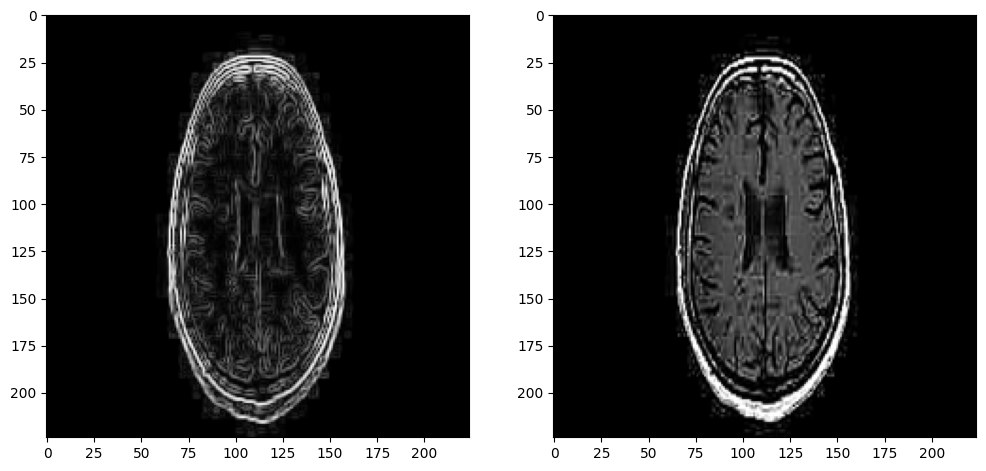

In [36]:
from skimage.filters import prewitt

prewitt_img = prewitt(og)
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(prewitt_img)
ax2.imshow(og)

plt.show()

•**	**Left Image**** (if ax2.imshow(og) is uncommented): The original image (og).


•**Right Image**e: The Prewitt-filtered image (prewitt_img), which will be a grayscale image where brighter regions

 represent stronger edges in the horizontal or vertical directions in the original image.


# Recommendation

Consider Advanced Techniques: Explore advanced techniques like adaptive thresholding, 

morphological operations, and machine learning algorithms for further image analysis and understanding.